<a href="https://colab.research.google.com/github/sayalibadole/Crash-Data-Report-Montgomery-County/blob/main/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Crash Data Report: Montgomery County**
----------------------------

### By Sayali Badole and Anitha Rajamohan
#### Date: 5/14/2022

## **Introduction**


This dataset is about the vehicle crash incidents that occurred on Montgomery County's roadways. This data includes information about the vehicle affected during the crash, the physical state of the victims involved in the accident, the surrounding conditions while the accident happened, the severity of the crash, etc. The dataset was sourced from [Crash Data](https://data.montgomerycountymd.gov/Public-Safety/Crash-Reporting-Drivers-Data/mmzv-x632) available at data.gov. We accessed this dataset on Thursday, ‎May ‎12, ‎2022 at ‏‎4:47pm.

In this report, we explore, analyze and model several ideas that could help reduce the accident rates. Starting off with some basic exploration and visualizing features that affect the severity of an injury the most, the potential reasons for accidents, we move forward by determining the different time frames that experienced the most amount of crashes.

Finally- the goal of this report is to predict if the victim would sustain an injury considering various predictors. Knowing what factors result in injuries could be useful for the transportation department to improve safety in the County of Montgomery.


First we will import some of the Python packages to be used.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest,mutual_info_classif
from sklearn.model_selection import train_test_split
from matplotlib import rcParams
from scipy.stats import chi2_contingency
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, learning_curve, GridSearchCV
from sklearn.model_selection import cross_val_score, cross_val_predict
from re import search
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn import tree
import graphviz 
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix

In [ ]:
sns.set()
sns.set_context('notebook') 
sns.set_style('whitegrid')
# set default plot size
rcParams['figure.figsize'] = 8,6

## **Read the data**

Reading the raw data from a google drive and storing it in a dataframe. 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# https://drive.google.com/file/d/1nVGJMauHYAcQ1W3UBiwIuGsLHS1LuDG5/view?usp=sharing
#https://docs.google.com/spreadsheets/d/11tXk6m2JHuHjd7jhInGqUE2iiaeK2hQ17vR-GWI1kWI/edit?usp=sharing
infile = '/content/drive/MyDrive/Colab Notebooks/Crash_Reporting_-_Drivers_Data.csv'
df= pd.read_csv(infile,low_memory=False)

## **Preliminary Data Exploration**

Starting off with getting to know the data. Here are the first few rows of the dataset.

In [ ]:
df.head()

,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Route Type,Road Name,Cross-Street Type,Cross-Street Name,Off-Road Description,...,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Vehicle Make,Vehicle Model,Equipment Problems,Latitude,Longitude,Location
0,DD5620004G,190046109,Rockville Police Departme,Property Damage Crash,09/26/2019 07:20:00 AM,NaN,NaN,NaN,NaN,PARKING LOT,...,15,No,No,2017,THOMAS,BUS,NO MISUSE,39.103518,-77.157669,"(39.10351817, -77.15766933)"
1,MCP29620057,200023865,Montgomery County Police,Property Damage Crash,06/18/2020 02:00:00 AM,County,DAIRYMAID DR,County,METZ DR,NaN,...,35,No,No,2020,UNK,UNK,UNKNOWN,39.154847,-77.271245,"(39.15484667, -77.271245)"
2,MCP3050004K,200016465,Montgomery County Police,Property Damage Crash,04/19/2020 03:39:00 PM,County,RUSSETT RD,County,ARCTIC AVE,NaN,...,25,No,No,2004,DODGE,GRAND CARAVAN,NO MISUSE,39.080062,-77.097845,"(39.08006167, -77.097845)"
3,MCP2641001J,200016526,Montgomery County Police,Injury Crash,04/20/2020 09:15:00 AM,County,ARCHDALE RD,County,GUNNERS BRANCH RD,NaN,...,25,No,No,2006,HONDA,CR-V,UNKNOWN,39.175230,-77.241090,"(39.17523, -77.24109)"
4,MCP27100039,200016305,Montgomery County Police,Property Damage Crash,04/17/2020 05:00:00 PM,Municipality,E DIAMOND AVE,Municipality,S SUMMIT AVE,NaN,...,25,No,No,2011,TOYOTA,4S,NaN,39.140555,-77.193347,"(39.140555, -77.19334667)"


We can see that there are 43 different columns, the first few rows gives us an idea about the type of data in the columns.

To get a more concise summary of the dataframe:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140844 entries, 0 to 140843
Data columns (total 43 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Report Number                   140844 non-null  object 
 1   Local Case Number               140844 non-null  object 
 2   Agency Name                     140844 non-null  object 
 3   ACRS Report Type                140844 non-null  object 
 4   Crash Date/Time                 140844 non-null  object 
 5   Route Type                      127088 non-null  object 
 6   Road Name                       127813 non-null  object 
 7   Cross-Street Type               127068 non-null  object 
 8   Cross-Street Name               127808 non-null  object 
 9   Off-Road Description            13029 non-null   object 
 10  Municipality                    15568 non-null   object 
 11  Related Non-Motorist            4382 non-null    object 
 12  Collision Type  

We can see that the data consists of 140844 enteries/rows and 43 features/columns. Most of the columns have object(String) values. 

There are 2 floating numeric datatypes Latitude and Longitude and 2 integer datatypes Speed Limit and Vehicle Year.

Short description all the variables in the dataset:

|Coloumn Name|Description|
|---|---|
|Report Number	|ACRS Report Number assigned to the incident.
|Local Case Number	|Case number from the local investigating agency for the incident.
|Agency Name	|Name of the investigating agency.
|ACRS Report Type	|Identifies crash as property, injury, or fatal.
|Crash Date/Time	|Date and Time of crash.
|Route Type	|Type of roadway at crash location.
|Road Name|Name of road.
|Cross-Street Type	|Roadway type for nearest cross-street.
|Cross-Street Name|Name of nearest cross-street.
|Off-Road Description	|Description of location for off-road collisions.
|Municipality	|Jurisdiction for crash location.
|Related Non-Motorist	|Type(s) of non-motorist involved.
|Collision Type	|Type of collision.
|Weather	|Weather at collision location.
|Surface Condition	|Condition of roadway surface.
|Light	|Lighting conditions.
|Traffic Control	|Signage or traffic control devices.
|Driver Substance Abuse	|Substance abuse detected for all drivers involved.
|Non-Motorist Substance Abuse	|Substance abuse detected for all non-motorists involved.
|Person ID	|Unique identifier for this non-motorist.
|Driver At Fault	|Whether this driver was at fault.
|Injury Severity	|Severity of injury to this driver.
|Circumstance	|Circumstance(s) specific to this driver.
|Driver Distracted By	|The reason the driver was distracted.
|Drivers License State	|The state the driver's license was issued.
|Vehicle ID	|The unique identifier for the driver's vehicle.
|Vehicle Damage Extent	|The severity of the vehicle damage.
|Vehicle First Impact Location	|Vehicle - Location of vehicle area where first impact occurred on.
|Vehicle Second Impact Location	|Vehicle - Location of vehicle area where second impact occurred on.
|Vehicle Body Type	|They body type of the vehicle.
|Vehicle Movement	|The movement of the vehicle at the time of the collision.
|Vehicle Continuing Dir	|Vehicle Circumstances - Continuation direction of vehicle after collisions
|Vehicle Going Dir	|Vehicle Circumstances - Movement of vehicle before collision.
|Speed Limit	|Vehicle Circumstances - Local area posted speed limit.
|Driverless Vehicle	|Vehicle Circumstances - If the vehicle was driverless or not.
|Parked Vehicle	|Vehicle - Defines if the vehicle was parked or not at the event.
|Vehicle Year	|Vehicle - The vehicle's year.
|Vehicle Make	|Vehicle - Make of the Vehicle
|Vehicle Model	|Vehicle - Model of the Vehicle
|Equipment Problems	|Driver - Improper use or safety equipment issues.
|Latitude	|Y coordinate of crash location.
|Longitude	|X coordinate of crash location.
|Location	|Location



Let's look at more statistical details of the dataset.

In [ ]:
df.describe().round(2)

,Speed Limit,Vehicle Year,Latitude,Longitude
count,140844.00,140844.00,140844.00,140844.00
mean,32.72,1967.32,39.08,-77.11
std,11.05,335.17,0.07,0.10
min,0.00,0.00,37.72,-79.49
25%,30.00,2005.00,39.02,-77.19
50%,35.00,2011.00,39.07,-77.11
75%,40.00,2015.00,39.14,-77.04
max,70.00,9999.00,39.99,-75.53


We can see that the max vehicle year value is 9999 which is clearly bad data. 

Let's look more into the possible error in Vehicle Year values:

In [ ]:
df["Vehicle Year"].value_counts().sort_index(ascending=False)

9999      48
8888       1
8008       1
7817       1
5005       1
        ... 
4          1
3          2
2          1
1          2
0       3138
Name: Vehicle Year, Length: 127, dtype: int64

Vehicle year above 2022 and below 1300 can be considered as bad data and can be removed.

How many unique values does each column in the dataset have?

In [ ]:
df.nunique()

Report Number                      79146
Local Case Number                  79054
Agency Name                           10
ACRS Report Type                       3
Crash Date/Time                    77228
Route Type                            10
Road Name                           3431
Cross-Street Type                     10
Cross-Street Name                   6185
Off-Road Description                9345
Municipality                          20
Related Non-Motorist                  11
Collision Type                        18
Weather                               12
Surface Condition                     11
Light                                  8
Traffic Control                       11
Driver Substance Abuse                11
Non-Motorist Substance Abuse          13
Person ID                         140844
Driver At Fault                        3
Injury Severity                        5
Circumstance                         183
Driver Distracted By                  19
Drivers License 

After having a look at the unique values, we can determine the type of the variables:

> **Discrete**: Report Number, datetime, off road description, person ID etc

> **Categorical**: Agency name, report type, light, weather, surface condition etc.

> **Boderline categorical**: Vehicle model, road name, cross-street name, circumstance, vehicle year etc.

What type of crash reports are made?

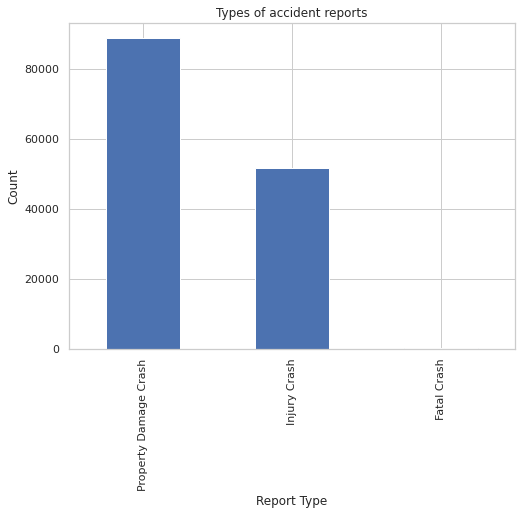

In [ ]:
df['ACRS Report Type'].value_counts().plot.bar()
plt.title('Types of accident reports')
plt.xlabel('Report Type')
plt.ylabel('Count');

These report types are in 3 main categories: Property Damage, Injury and Fatal Crash.

How severely were the vehicles damaged?

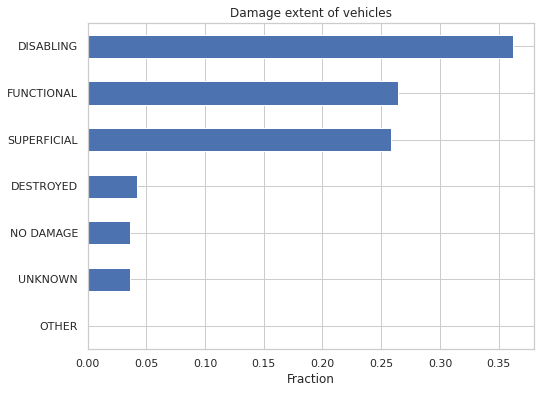

In [ ]:
df['Vehicle Damage Extent'].value_counts(normalize=True).sort_values().plot.barh()
plt.title('Damage extent of vehicles')
plt.xlabel('Fraction');

A lot of the vehicles were disabled or could not be driven from the scene of accident and had to be towed away. 

Most of the vehicles were functional(need not to be towed away) or have superficial damages like minor dents. 

What type of vehicles were affected the most in crashes?

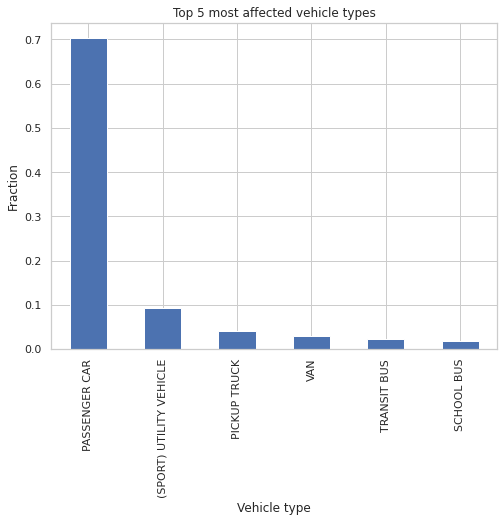

In [ ]:
df['Vehicle Body Type'].value_counts(normalize=True)[:6].plot.bar()
plt.title('Top 5 most affected vehicle types')
plt.xlabel('Vehicle type')
plt.ylabel('Fraction');

Most of the vehicles were cars. There were also other vehicles like pickup trucks, utility vehicles, vans and buses.

What are the most common types of accidents and how severely are the victims injured?

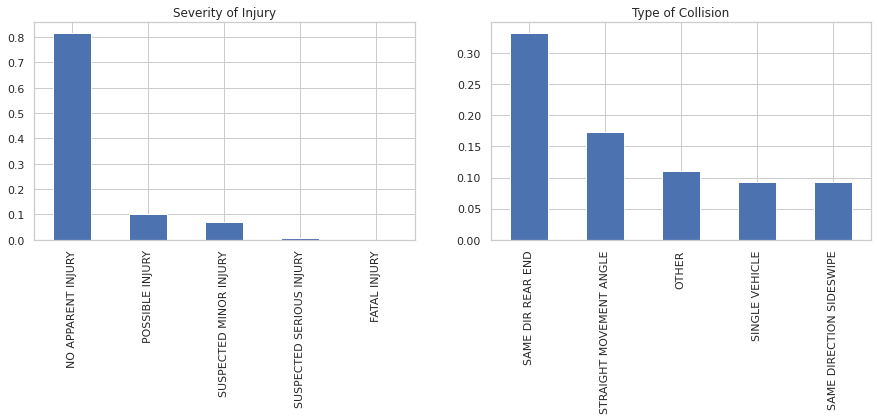

In [ ]:
fig,ax = plt.subplots(1, 2, figsize=(15, 4))
df['Injury Severity'].value_counts(normalize=True).plot.bar(ax=ax[0]).set_title('Severity of Injury')
df['Collision Type'].value_counts(normalize=True)[:5].plot.bar(ax=ax[1]).set_title('Type of Collision');

We can see that in most of the cases there were no apparent injuries, whereas there were a few incidents of possible and serious injuries.

In case of the type of accidents, lot of accidents were rear end. Rear end accidents are the one where the vehicle crashes into the one infront of it. Although these are one of the most frequent type of accidents they are not very fatal. This could explain the higher ratio of "No Apparent Injury" column in Injury severity.

What were the most common environmental conditions during the sight of accident?

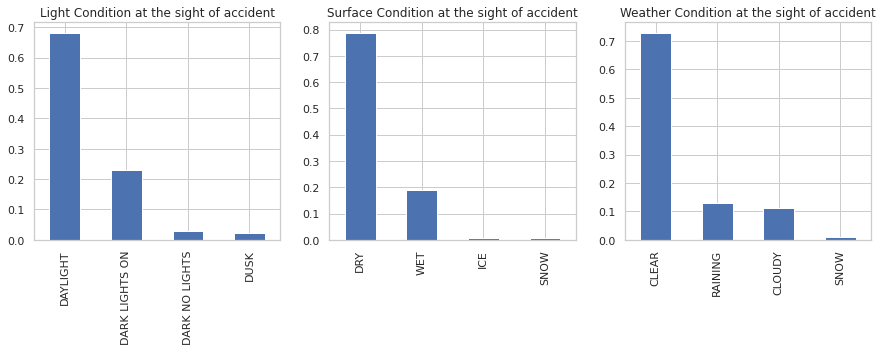

In [ ]:
fig,ax = plt.subplots(1, 3, figsize=(15, 4))
df['Light'].value_counts(normalize=True)[:4].plot.bar(ax=ax[0]).set_title('Light Condition at the sight of accident')
df['Surface Condition'].value_counts(normalize=True)[:4].plot.bar(ax=ax[1]).set_title('Surface Condition at the sight of accident')
df['Weather'].value_counts(normalize=True)[:4].plot.bar(ax=ax[2]).set_title('Weather Condition at the sight of accident');

From these plots it can be seen that the surronding conditions during the time of accident were good for the most part. 

## **Data Cleaning and Preprocessing**

How many NA values does the dataset have?

In [ ]:
df.isna().mean().round(3).sort_values(ascending=False)[:24]

Non-Motorist Substance Abuse      0.975
Related Non-Motorist              0.969
Off-Road Description              0.907
Municipality                      0.889
Circumstance                      0.813
Equipment Problems                0.210
Driver Substance Abuse            0.183
Traffic Control                   0.154
Surface Condition                 0.118
Cross-Street Type                 0.098
Route Type                        0.098
Road Name                         0.093
Cross-Street Name                 0.093
Weather                           0.079
Drivers License State             0.053
Vehicle Body Type                 0.015
Vehicle Continuing Dir            0.015
Vehicle Going Dir                 0.015
Light                             0.008
Collision Type                    0.003
Vehicle Damage Extent             0.002
Vehicle Second Impact Location    0.002
Vehicle Movement                  0.002
Vehicle First Impact Location     0.001
dtype: float64

Some of the columns have a lot of NA values. Our next step would be to clean our dataset. 

Here is the percentage of NA values before cleaning:

In [ ]:
round(df.isna().mean().mean(),3)

0.135

Almost 13.5% of the data is NA values.  

Dropping all the columns we don't need for our project:

In [ ]:
df.drop(['Non-Motorist Substance Abuse','Related Non-Motorist','Vehicle Make','Vehicle Second Impact Location','Drivers License State','Off-Road Description','Municipality','Circumstance','Equipment Problems','Cross-Street Type','Route Type','Road Name','Cross-Street Name','Vehicle Continuing Dir','Vehicle Going Dir','Vehicle Model','Parked Vehicle','Driverless Vehicle','Latitude','Longitude','Report Number','Vehicle ID','Local Case Number','Person ID','Location'],axis=1,inplace=True)

Treating bad data: Imputing values such as "Unknown" to NA values

In [ ]:
df.replace(['Unknown','UNKNOWN'], np.nan, inplace=True)

Dealing with outliers: Treating the bad data in Vehicle Year column

In [ ]:
df_mask = df['Vehicle Year'][~df['Vehicle Year'].between(1900,2022)]
df['Vehicle Year'].replace(list(df_mask), np.nan, inplace=True)

In [ ]:
df['Vehicle Year'].unique()

array([2017., 2020., 2004., 2006., 2011., 2018., 2014., 2008., 2003.,
       1996., 1998., 2007.,   nan, 2016., 2015., 2013., 1994., 2005.,
       2019., 2009., 2010., 1997., 1995., 2012., 2000., 1978., 2002.,
       2001., 1999., 1991., 1989., 1972., 1988., 1955., 1993., 1992.,
       1990., 1983., 1985., 1966., 1968., 1900., 1987., 2021., 1986.,
       2022., 1979., 1984., 1980., 1981., 1970., 1982., 1965., 1947.,
       1946., 1971., 1963., 1977., 1960., 1974., 1969., 1975., 1901.,
       1967., 1911., 1959., 1949., 1976., 1930.])

Now the Vehicle Years are only in the range 1900-2022. The ouliers like 9999 and 1300 were removed.

Converting the date and time of accident from object type to timestamps.

In [ ]:
df['Crash Date/Time'] = pd.to_datetime(df['Crash Date/Time'])

Calculating:
> Hour of accident

> What time of the day did the accident took place?

> Did the accident take place during the peak hour of the day?

In [ ]:
df['hour_of_accident'] = df['Crash Date/Time'].dt.hour

def convert_time_of_day(x):
  if((x >= 5) and (x < 12)):
    return "Morning"
  elif((x >= 12) and (x < 17)):
    return "Midday"
  elif ((x >= 17) and (x < 20)):
    return "Evening"
  elif ((x >= 20) and (x < 24)):
    return "Night"  
  else:
    return "MidNight"

def convert_peekHour(x):
  if(((x >= 6) and (x < 9)) or ((x >= 15) and (x <= 17))):
    return "PeekHour" 
  else:
    return 'NonPeekHour'

df['time_of_day'] = df['hour_of_accident'].apply(lambda x: convert_time_of_day(x))
df['peekHour_of_day'] = df['hour_of_accident'].apply(lambda x: convert_peekHour(x))

Modifying values: Grouping up subcategories/least-apperaring categories into a general terms.

In [ ]:
df['Collision Type'].replace(['SAME DIRECTION RIGHT TURN','SAME DIRECTION LEFT TURN','HEAD ON','ANGLE MEETS LEFT TURN','OPPOSITE DIRECTION SIDESWIPE','ANGLE MEETS RIGHT TURN','SAME DIR REND RIGHT TURN','ANGLE MEETS LEFT HEAD ON','SAME DIR REND LEFT TURN','SAME DIR BOTH LEFT TURN','OPPOSITE DIR BOTH LEFT TURN'],'OTHER',inplace=True)
df['Weather'].replace(['SNOW','FOGGY','WINTRY MIX','SLEET','SEVERE WINDS','BLOWING SNOW','BLOWING SAND, SOIL, DIRT'],'OTHER',inplace=True)
df['Surface Condition'].replace(['SNOW','ICE','SLUSH','WATER(STANDING/MOVING)','MUD, DIRT, GRAVEL','OIL','SAND'], 'OTHER',inplace=True)
df['Light'].replace('DAYLIGHT','Light',inplace=True)
df['Light'].replace(['DARK LIGHTS ON','DUSK','DAWN','DARK -- UNKNOWN LIGHTING'],'Partial Light',inplace=True)
df['Light'].replace('DARK NO LIGHTS','No Light',inplace=True)
df['Driver Substance Abuse'].replace(['ALCOHOL PRESENT','ALCOHOL CONTRIBUTED','ILLEGAL DRUG PRESENT','MEDICATION PRESENT','ILLEGAL DRUG CONTRIBUTED','MEDICATION CONTRIBUTED','COMBINED SUBSTANCE PRESENT','COMBINATION CONTRIBUTED','OTHER'],'Under influence', inplace=True)
df['Driver Substance Abuse'].replace('NONE DETECTED', 'Noinfluence',inplace=True)
df['Driver Distracted By'].replace(['BY OTHER OCCUPANTS','OTHER CELLULAR PHONE RELATED','OTHER ELECTRONIC DEVICE (NAVIGATIONAL PALM PILOT)','TALKING OR LISTENING TO CELLULAR PHONE','BY MOVING OBJECT IN VEHICLE','EATING OR DRINKING','ADJUSTING AUDIO AND OR CLIMATE CONTROLS','USING DEVICE OBJECT BROUGHT INTO VEHICLE','USING OTHER DEVICE CONTROLS INTEGRAL TO VEHICLE','TEXTING FROM A CELLULAR PHONE','DIALING CELLULAR PHONE','SMOKING RELATED','NO DRIVER PRESENT'],'OTHER',inplace=True)
df['Vehicle Body Type'].replace(['OTHER LIGHT TRUCKS (10,000LBS (4,536KG) OR LESS)','POLICE VEHICLE/NON EMERGENCY','CARGO VAN/LIGHT TRUCK 2 AXLES (OVER 10,000LBS (4,536 KG))','MEDIUM/HEAVY TRUCKS 3 AXLES (OVER 10,000LBS (4,536KG))','POLICE VEHICLE/EMERGENCY','MOTORCYCLE','STATION WAGON','TRUCK TRACTOR','OTHER BUS','AMBULANCE/EMERGENCY','FIRE VEHICLE/EMERGENCY','RECREATIONAL VEHICLE','FIRE VEHICLE/NON EMERGENCY','AMBULANCE/NON EMERGENCY','SNOWMOBILE','ALL TERRAIN VEHICLE (ATV)','MOPED','AUTOCYCLE','LOW SPEED VEHICLE','CROSS COUNTRY BUS','LIMOUSINE','FARM VEHICLE'],'OTHER', inplace=True)
df['Vehicle Movement'].replace('STOPPED IN TRAFFIC LANE','SLOWING OR STOPPING', inplace=True)
df['Vehicle Movement'].replace(['BACKING','MAKING U TURN','PARKED','STARTING FROM PARKED','ENTERING TRAFFIC LANE','SKIDDING','PASSING','OTHER','NEGOTIATING A CURVE','RIGHT TURN ON RED','PARKING','LEAVING TRAFFIC LANE','DRIVERLESS MOVING VEH.'], "OTHER",inplace=True)
df['Traffic Control'].replace('FLASHING TRAFFIC SIGNAL','TRAFFIC SIGNAL',inplace=True)
df['Traffic Control'].replace(['PERSON','WARNING SIGN','RAILWAY CROSSING DEVICE','SCHOOL ZONE SIGN DEVICE'],'OTHER',inplace=True)
df['Vehicle First Impact Location'].replace(['FOUR OCLOCK','SEVEN OCLOCK','EIGHT OCLOCK','FIVE OCLOCK','NINE OCLOCK','THREE OCLOCK','UNDERSIDE','NON-COLLISION','ROOF TOP'],'OTHER',inplace=True)

NA values after cleaning:

In [ ]:
round(df.isna().mean().mean(),3)

0.046

Since it's just 4.3% of the whole data, we would drop all the rows with NA values.

In [ ]:
df.dropna(inplace=True)

## **Data Exploration and Visualization**

> Does the severity of injury depend on the movment of the vehicle just before the accident happens?

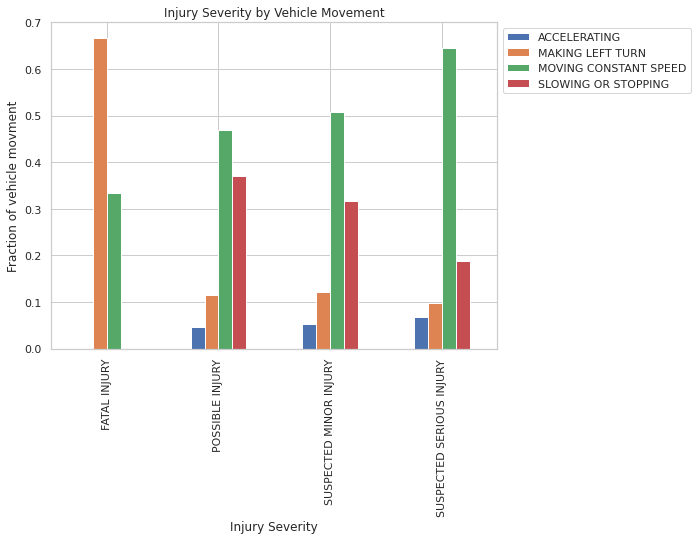

In [ ]:
df_severe = df[(df['Injury Severity'] == 'FATAL INJURY') |(df['Injury Severity'] == 'SUSPECTED SERIOUS INJURY')|(df['Injury Severity'] == 'POSSIBLE INJURY')|(df['Injury Severity'] == 'SUSPECTED MINOR INJURY') ]
df_vmov = df[(df['Vehicle Movement'] == 'MOVING CONSTANT SPEED') | (df['Vehicle Movement'] == 'SLOWING OR STOPPING') | (df['Vehicle Movement'] == 'MAKING LEFT TURN')|(df['Vehicle Movement'] == 'ACCELERATING')]
pd.crosstab(df_severe['Injury Severity'], df_vmov['Vehicle Movement'], normalize='index').plot.bar()
plt.title('Injury Severity by Vehicle Movement')
plt.ylabel("Fraction of vehicle movment")
plt.legend(bbox_to_anchor=(1,1));

It can be seen that the most fatal accidents happen while making left turns. Left turns are dangerous because drivers have to divert their attention to multiple hazards like other vehicles,traffic lights etc.

Also, moving with constant speed (which could be considered as safe driving practice) results in a lot of suspected serious and minor injuries. 

> What type of accidents causes the most severe injuries?

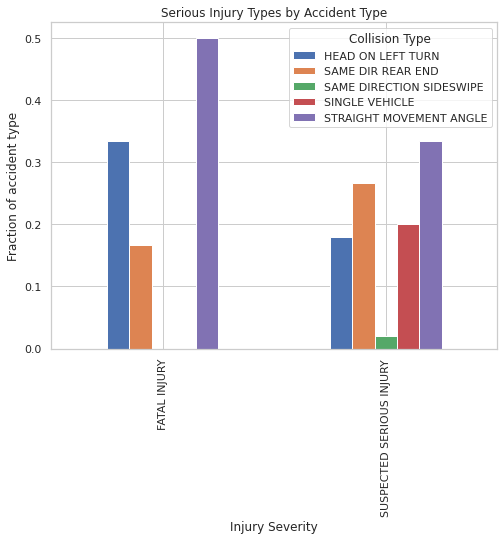

In [ ]:
df_severe = df[(df['Injury Severity'] == 'FATAL INJURY') |(df['Injury Severity'] == 'SUSPECTED SERIOUS INJURY') ]
df_coll = df[(df['Collision Type'] != 'OTHER')]
pd.crosstab(df_severe['Injury Severity'], df_coll['Collision Type'], normalize='index').plot.bar();
plt.title("Serious Injury Types by Accident Type")
plt.ylabel("Fraction of accident type");

It can be seen that fatal injuries are caused mostly by head on left turn and straight movement angle. This plot makes it clear that left turn can be risky. 

Also a crash from an angle is considered more risky that a straight-on collision. It increases the risk of a whiplash or neck injury. It can be seen from the data that straight movement angle crashes are the most fatal. 

> How about vehicle movment affecting the collision type?

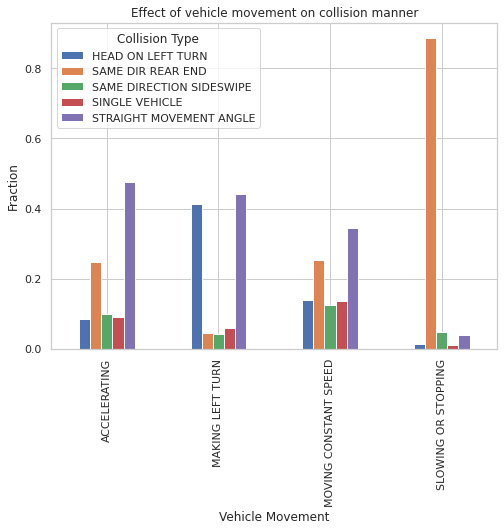

In [ ]:
pd.crosstab(df_vmov['Vehicle Movement'], df_coll['Collision Type'], normalize='index').plot.bar();
plt.title("Effect of vehicle movement on collision manner")
plt.ylabel("Fraction");

We can see that slowing or stopping of the vehicle results in most of the rear end accidents. This is expected as most of rear end accidents happen when there is not enought distance between the vehicles and the driver tries to slow down to avoid the accident.

Angled-accidents are caused mostly when the driver is making a turn and accelerating. 

> What was the speed limit of the vehicles during the time of accident?

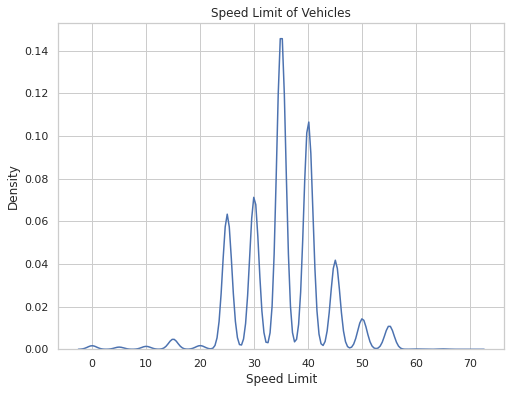

In [ ]:
sns.kdeplot(df['Speed Limit'])
plt.title('Speed Limit of Vehicles');

Most of the vehicles were in the speed limit of 35mph which is a normal limit to drive. This could be because a lot of accidents were rear end accidents and the speed of the vehicle is not over the usual speed limit. 

What about the driver's physical state? 
>Were they under any influence?

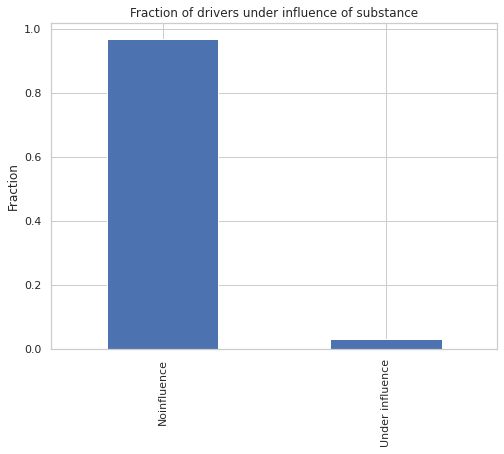

In [ ]:
df['Driver Substance Abuse'].value_counts(normalize=True).plot.bar();
plt.title('Fraction of drivers under influence of substance')
plt.ylabel('Fraction');

Although there were a small amount of people under the influence of alcohol, most of the accidents happen when people were under control. 

> Is the driver following the speed limit given they are under influence? 

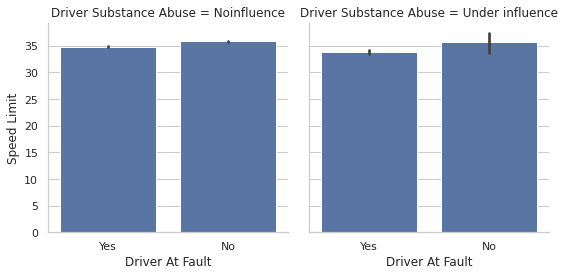

In [ ]:
grid = sns.FacetGrid(df, col="Driver Substance Abuse", height=4, aspect=1)
grid.map(sns.barplot, "Driver At Fault", "Speed Limit", order=["Yes", "No"]);
#######

We can see that the speed limit is a bit higher for when the driver is under influence and not at fault. 

> What is the variation in number of crashes over the years?

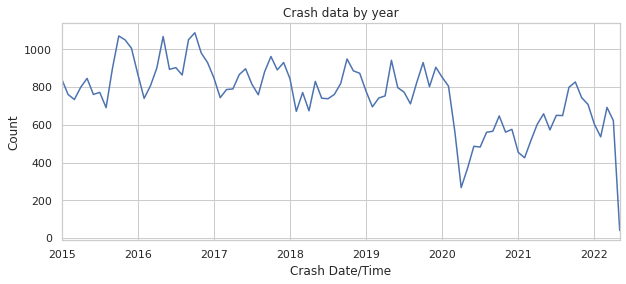

In [ ]:
plt.figure(figsize=(10,4))
df.resample('M', on='Crash Date/Time').size().plot()
plt.title('Crash data by year')
plt.ylabel('Count');

We can see that the numbers were consistent over the year but the cases dropped suddenly in the year 2020. From there the numbers went steady again but not as much as the previous years. There were 2 more smaller dips in year 2021 and 2022- these could be because of the imposed COVID-19 lockdown during the 1st, 2nd and 3rd wave of Covid. Due to the travel restrictions, the number of crashes decreased too. 

> What day of the week did the maximum number of crashes happen?

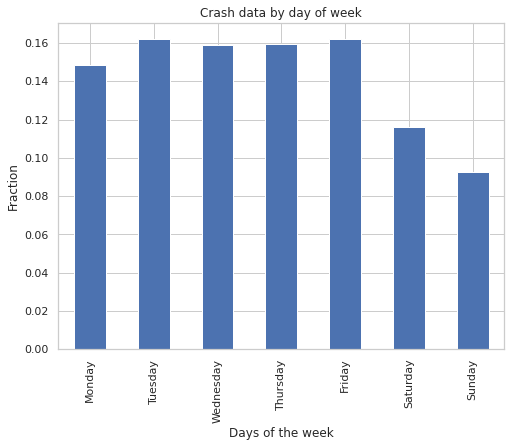

In [ ]:
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
df['Crash Date/Time'].dt.day_name().value_counts(normalize=True)[days].plot.bar()
plt.title('Crash data by day of week')
plt.xlabel('Days of the week')
plt.ylabel('Fraction');

We can see that weekdays experienced more crashes than the weekends. Lower traffic during the weekends result in lower crashes. 

> What hour of the day did the maximum number of accidents take place?

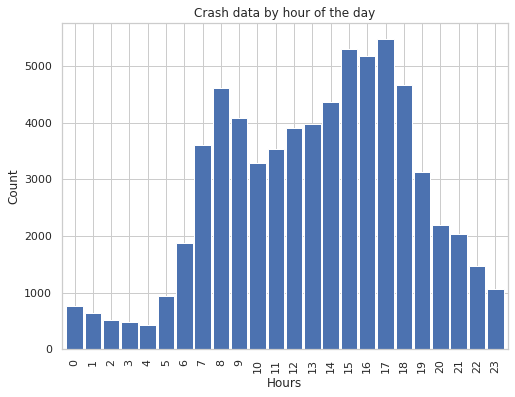

In [ ]:
df['hour_of_accident'].value_counts().sort_index().plot.bar(width=0.9)
plt.title("Crash data by hour of the day")
plt.xlabel('Hours')
plt.ylabel("Count");

We can see that most of the accidents took place between 7-9am and 3-5pm. These are considered to be the busiest times of the day- the traffic congestion is at it's highest resulting in more accidents. 

> Are the victims under any influence on specific hours of the day?

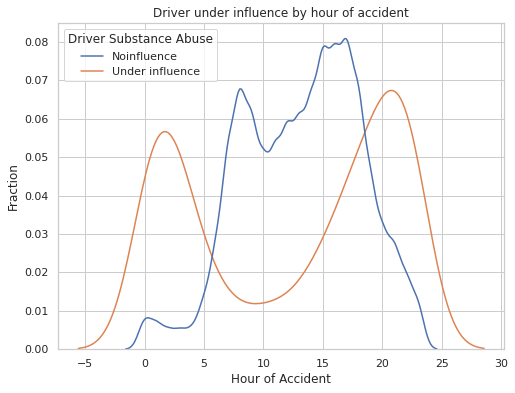

In [ ]:
sns.kdeplot(df['hour_of_accident'], hue='Driver Substance Abuse', data=df, common_norm=False)
plt.title("Driver under influence by hour of accident")
plt.xlabel("Hour of Accident")
plt.ylabel("Fraction");

It can be seen that crashes after the dark(from 8pm to 2am) are greatly caused due to victims under influence. While the crashes that happened during the day were not under much influence of substance. Driving in the dark under the influence is inherently more difficult than driving during daylight hours- this can results in increased crashes. 

## **Preprocessing for Machine Learning**

Converting the injury severities into categorical column "Injury" with values 0 and 1 ,where 0 would mean that the victim has sustained no injury and 1 would mean that injury was involved.

In [ ]:
df['Injury Severity'].replace("NO APPARENT INJURY",0,inplace=True)
df['Injury Severity'].replace(['POSSIBLE INJURY','SUSPECTED MINOR INJURY','SUSPECTED SERIOUS INJURY','FATAL INJURY'],1,inplace=True)
df['Injury']=df['Injury Severity']

In [ ]:
df.shape

(67545, 22)

There are 22 columns in this dataset. Most of these columns have categorical values. We would be converting these categories in numeric values to perform machine learning. 

Dropping the columns we won't need for our machine learning model:

In [ ]:
df.drop(['Agency Name','Crash Date/Time','Injury Severity','Vehicle Year','Vehicle First Impact Location','ACRS Report Type'],axis=1,inplace=True)

Converting all the categorical variables into numeric variable:

In [ ]:
df = pd.get_dummies(df, drop_first=True)

In [ ]:
df.shape

(67545, 50)

We can see that the the number of columns have increased from 22 to 50. These are all the categories in the dataset having their own columns.

Converting cyclical data to numeric values:

In [ ]:
df['hour_sin'] = np.sin(2 * np.pi * df['hour_of_accident']/23.0)
df['hour_cos'] = np.cos(2 * np.pi * df['hour_of_accident']/23.0)

Setting our target and predictors for the model:

In [ ]:
target='Injury' 
predictors = list(df.columns)
predictors.remove(target)

In [ ]:
X = df[predictors].values
y = df[target].values

To start with, we will be using all data columns as our predictors. 
Our target is to predict if there is any injury involved based on the different predictors. 

**Train/Test Split:**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [ ]:
print('The training set has {} rows, with {} predictor variables.'.format(X_train.shape[0], X_train.shape[1]))

The training set has 47281 rows, with 51 predictor variables.


**Scale the data:**
> Scaling the Speed Limit of the dataset. We would only scale the quanttitative variables and not the dummy variables.

In [ ]:
quant_features = [0]
xform = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), quant_features)
    ],
    remainder='passthrough'  # do nothing with other columns
)

In [ ]:
X_train = xform.fit_transform(X_train)
X_test  = xform.transform(X_test)

Let's check if the shape of our training data has changed

In [ ]:
print(X_train.shape)

(47281, 51)


It has not, this means that the data was scaled correctly.

**Baseline Accuracy**
> Baseline accuracy is the accuracy you would get for always predicting the most common target value. We would always compare our model accuracy to the baseline accuracy to make sure we are improving our predictions. 

In [ ]:
vals, counts = np.unique(y_train, return_counts=True)
target_mode = vals[counts.argmax()]
print('This is our most common target value: {}'.format(target_mode))

This is our most common target value: 0


The target value of 0 means that there is no injury involed at the sight of accident. 

In [ ]:
baseline= (y_train==target_mode).mean() 
print('Baseline Accuracy: {:.3f}'.format(baseline))

Baseline Accuracy: 0.792


Our current baseline accuracy is about 0.79. Which means that we can achieve about 0.79 accuracy by always predicting that the victim is not injured. 

We will be balancing these values to make sure we can generate higher accuracy models.

In [ ]:
df['Injury'].value_counts()

0    53489
1    14056
Name: Injury, dtype: int64

The data is heavily imbalanced, we would be performing **undersampling** to balance out the rows of injury column.

In [ ]:
minority_rows = df[df['Injury'] == 1]
minority_count = minority_rows.shape[0]
majority_rows = df[df['Injury'] == 0].sample(minority_count,replace=False)
df= pd.concat([majority_rows, minority_rows])
df= df.sample(frac=1).reset_index(drop=True)

Let's do a sanity check to make sure the data is balanced:

In [ ]:
df['Injury'].value_counts()

0    14056
1    14056
Name: Injury, dtype: int64

What will be the baseline accuracy?

In [ ]:
target='Injury' 
predictors = list(df.columns)
predictors.remove(target)
X = df[predictors].values
y = df[target].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [ ]:
quant_features = [0]
xform = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), quant_features)
    ],
    remainder='passthrough'  # do nothing with other columns
)

X_train = xform.fit_transform(X_train)
X_test  = xform.transform(X_test)

In [ ]:
vals, counts = np.unique(y_train, return_counts=True)
target_mode = vals[counts.argmax()]
baseline= (y_train==target_mode).mean() 
print('New Baseline Accuracy: {:.3f}'.format(baseline))

New Baseline Accuracy: 0.501


The baseline accuracy is now about 0.50 since we have balanced the values.

The dataset is not ready to be modeled to make predictions.

# **Machine Learning**
 > For this we will be predicting if a victim of vehicle accident would sustain an injury based on various predictors. **KNN Classification** and **Decision Trees** are the two modeling techniques being used for these predictions.

> #### **KNN CLASSIFICATION**


To start off with, we would be training our model using the default K value. 

In [ ]:
clf = KNeighborsClassifier()

**Cross validation accuracy:**

In [ ]:
accs = cross_val_score(clf, X_train, y_train, scoring="accuracy", cv=10).mean()
print('Cross-validation accuracy: {:.3f}'.format(accs))

Cross-validation accuracy: 0.592


Our KNN model with default parameters was able to increase the accuracy from 0.50 to 0.58. However, we could be overfitting.A learning curve would help check the overfitting. 

In [ ]:
def plot_learning_curve(train_sizes, train_scores, test_scores):
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean  = np.mean(test_scores, axis=1)
    plt.plot(train_sizes, train_scores_mean, label='train')
    plt.plot(train_sizes, test_scores_mean, label='test')
    plt.xlabel('training set size')
    plt.ylabel('accuracy')
    plt.title('Learning curve')
    plt.legend();

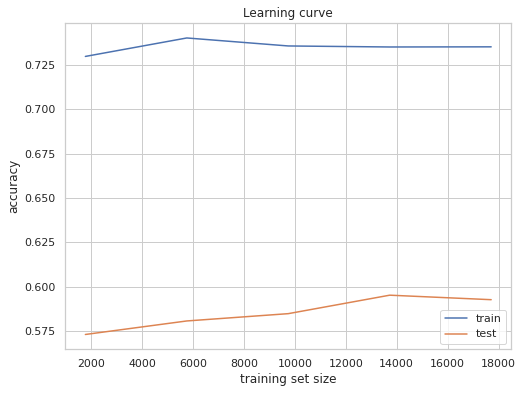

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(clf, X_train, y_train, cv=10, scoring='accuracy')
plot_learning_curve(train_sizes, train_scores, test_scores)

We can see that there is overfiting present. The most important sympton of overfitting is the large difference between training and test set error. 

Ways to deal with overfitting?
> Feature Selection &
> Hyperparameter Tuning

Finding the best features based on how these variable relate to the target variable. 

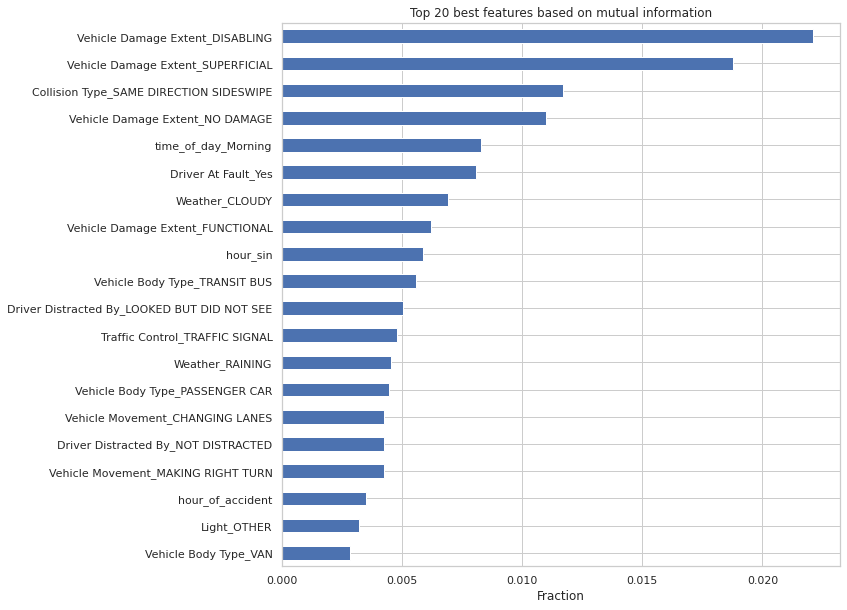

In [ ]:
selector = SelectKBest(mutual_info_classif, k=10)
selector.fit(X_train, y_train)
plt.figure(figsize=(10,10))
pd.Series(selector.scores_, index=predictors).sort_values(ascending=False)[:20].sort_values().plot.barh()
plt.title("Top 20 best features based on mutual information");
plt.xlabel("Fraction");

The top features are sub categories of vehicle damage extent, driver at fault, weather, collision type etc. 

We will be taking the top 5 best features as our predictors values.

In [ ]:
target_knn='Injury' 
predictors_knn = ['Vehicle Damage Extent_DISABLING','Vehicle Damage Extent_SUPERFICIAL','Driver At Fault_Yes','Weather_RAINING','Collision Type_SAME DIRECTION SIDESWIPE']

In [ ]:
X_knn= df[predictors_knn].values
y_knn = df[target_knn].values

In [ ]:
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_knn, y_knn, test_size=0.30, random_state=0)

In [ ]:
quant_features = [0]
xform = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), quant_features)
    ],
    remainder='passthrough'  # do nothing with other columns
)

X_train_knn = xform.fit_transform(X_train_knn)
X_test_knn  = xform.transform(X_test_knn)

In [ ]:
print('The training set has {} rows, with {} predictor variables.'.format(X_train_knn.shape[0], X_train_knn.shape[1]))

The training set has 19678 rows, with 5 predictor variables.


Calculating the best k value for our model:

In [ ]:
cv_accuracy = []
ks = range(20,40,2)
for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k)
    # YOUR CODE HERE
    accs = cross_val_score(knn, X_train_knn, y_train_knn, scoring="accuracy", cv=10)
    cv_accuracy.append(accs.mean())

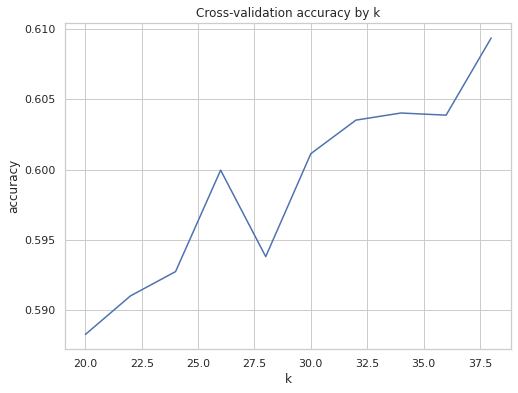

In [ ]:
plt.plot(ks, cv_accuracy)
plt.title('Cross-validation accuracy by k')
plt.xlabel('k')
plt.ylabel('accuracy');

We can see that the best k value is about 36. We will be tuning the dataset based on the best K value.

In [ ]:
clf = KNeighborsClassifier(n_neighbors=37)
clf.fit(X_knn, y_knn)
y_pred = clf.predict(X_knn)

In [ ]:
accs = cross_val_score(clf, X_train_knn, y_train_knn, scoring="accuracy", cv=10).mean()
print('Cross-validation accuracy: {:.3f}'.format(accs))

Cross-validation accuracy: 0.593


It can be seen that the accuracy has increased from 0.58 to 0.60. How about the overfitting?

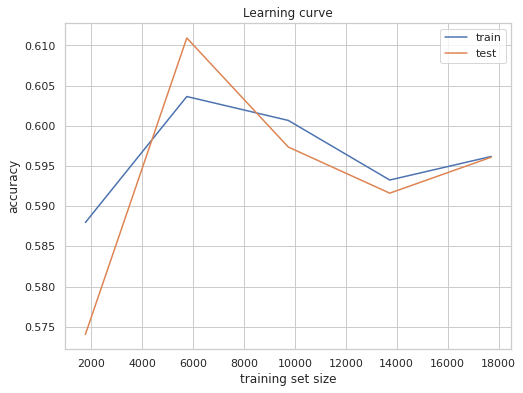

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(clf, X_train_knn, y_train_knn, cv=10, scoring='accuracy')
plot_learning_curve(train_sizes, train_scores, test_scores)

Since there is not much difference between the test and training accuracies, we can say that our data is not overfiting anymore. 

We will now test our model on training data:

In [ ]:
test_accuracy = clf.score(X_test_knn,y_test_knn)
print('Test accuracy: {:.3f}'.format(test_accuracy))

Test accuracy: 0.609


We have a test accuracy of 0.61. The following features did a decent job predicting if a victim is injured during an accident or not. 

# Decision Tree Models

Assigning the target and predictors:

We will be taking all the columns of the dataset as target to achive overfitting. 

In [ ]:
target = 'Injury'
predictors = list(df.columns)
predictors.remove(target)

X = df[predictors].values
y = df[target].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

Training the decision tree:
> We expect to reach overfitting with max depth of 8.

In [ ]:
clf = DecisionTreeClassifier(max_depth=8, random_state=0)

In [ ]:
accs = cross_val_score(clf, X_train, y_train, scoring="accuracy", cv=10)
cv_accuracy=accs.mean()
print('Cross-Validation Accuracy: {:.3f}'.format(cv_accuracy)) 

Cross-Validation Accuracy: 0.655


It can bee seen that the accuracy increased from 0.50 tt0 0.65 after implementing the classification tree.

Does the model show overfitting? A high-variance situation will confirm overfitting in the dataset.

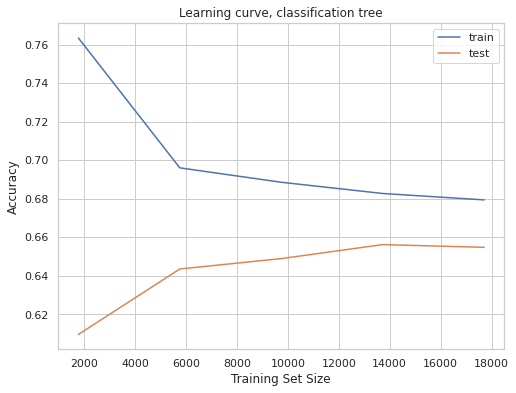

In [ ]:
def plot_learning_curve(clf, X_train, y_train):
   
    train_sizes, train_scores, test_scores = \
    learning_curve(clf, X_train, y_train, cv=10, scoring='accuracy')
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.plot(train_sizes, train_scores_mean, label='train')
    plt.plot(train_sizes, test_scores_mean, label='test')
    plt.xlabel('Training Set Size')
    plt.ylabel('Accuracy')
    plt.title('Learning curve, classification tree')
    plt.legend();
plot_learning_curve(clf, X_train, y_train)

This learning curve does show overfitting, as expected.

Overfitting can be reduced using proper feature selection and hyperparameter tuning:

Grid search can be used to find the best hyperparameters for our decision tree.

In [ ]:
grid = [ {'max_depth':range(2,9), 'min_samples_leaf':range(10,100,10), 'max_features':['auto',None]} ]
tree_cv = GridSearchCV(DecisionTreeClassifier(), grid, cv=10,scoring='accuracy')
tree_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid=[{'max_depth': range(2, 9),
                          'max_features': ['auto', None],
                          'min_samples_leaf': range(10, 100, 10)}],
             scoring='accuracy')

In [ ]:
print(tree_cv.best_params_)

{'max_depth': 8, 'max_features': None, 'min_samples_leaf': 30}


It can be seen that a tree depth of 6 works the best. For the number of sample leaves, we would not want training examples with less than 10 leaf nodes.

In [ ]:
print('Top accuracy from grid search: {:.3f}'.format(tree_cv.best_score_)) 

Top accuracy from grid search: 0.663


There is not much improvment in the accuracy, but what about overfitting?

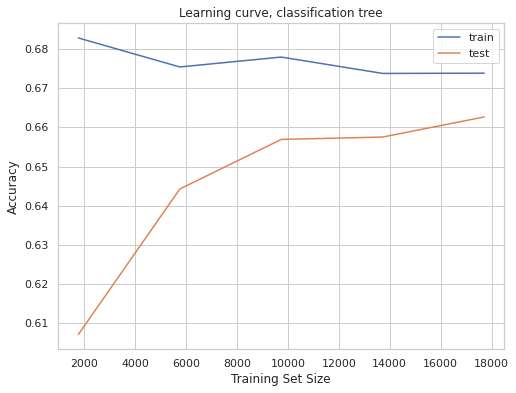

In [ ]:
plot_learning_curve(tree_cv.best_estimator_,X_train,y_train)

It can be seen that overfitting has reduced significantly. In the previous graph the difference between the test and tain accuracies was about 0.14, whereas after hyperparameter tuning it has reduced to 0.04.

Here is the plot of the tuned tree:

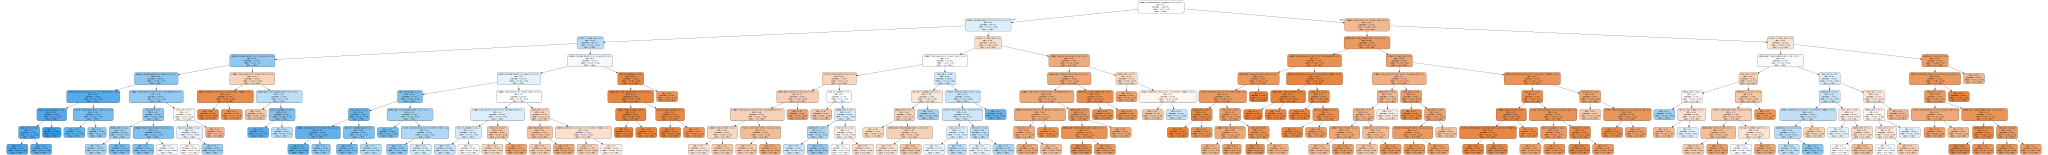

In [ ]:
def plot_tree_custom(clf):
    
    target_names = ['No Injury', 'Injury']
    dot_data = export_graphviz(clf, precision=2,
                         feature_names=predictors,  
                         proportion=True,
                         class_names=target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)

    # plot it
    graph = graphviz.Source(dot_data)  
    return graph
plot_tree_custom(tree_cv.best_estimator_)

Let's look at the top most important features of this classification tree:

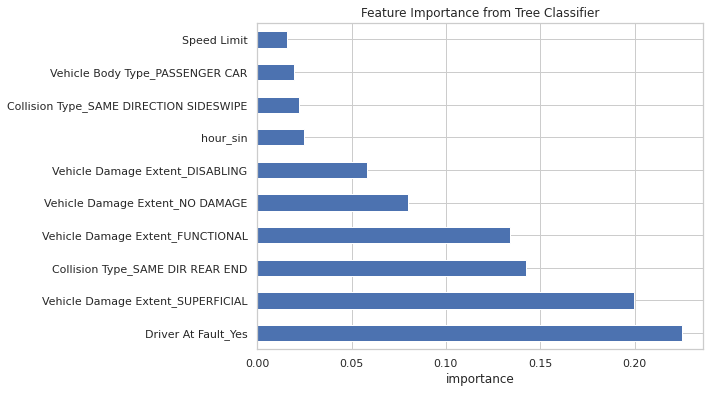

In [ ]:
clf=tree_cv.best_estimator_
clf.fit(X_train, y_train)
df1=pd.Series(clf.feature_importances_, predictors)
df1.sort_values(ascending=False)[:10].plot.barh()
plt.title("Feature Importance from Tree Classifier")
plt.xlabel("importance");

Very similar to the KBestSelector, feature importance also gives us features like Driver at Fault, Vehicle damage extent, collision type as the most importance features in the dataset.

How well does the model work on test data?

In [ ]:
clf=tree_cv.best_estimator_
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
score= (y_pred==y_test).mean()
print('Test accuracy: {:.3f}'.format(score))

Test accuracy: 0.660


We can see that the test accuracy is much greater than the baseline accuracy of 50%.


The speed and time of the accident might give more data about injury severity, so let's make a different tree to check that information.

In [ ]:
target_tree='Injury' 
predictors_tree = ['hour_of_accident','Speed Limit']
X_tree= df[predictors_tree].values
y_tree = df[target_tree].values

In [ ]:
X_train_tree, X_test_tree, y_train_tree, y_test_tree = train_test_split(X_tree, y_tree, test_size=0.30, random_state=0)

In [ ]:
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_train_tree, y_train_tree)

DecisionTreeClassifier(max_depth=3)

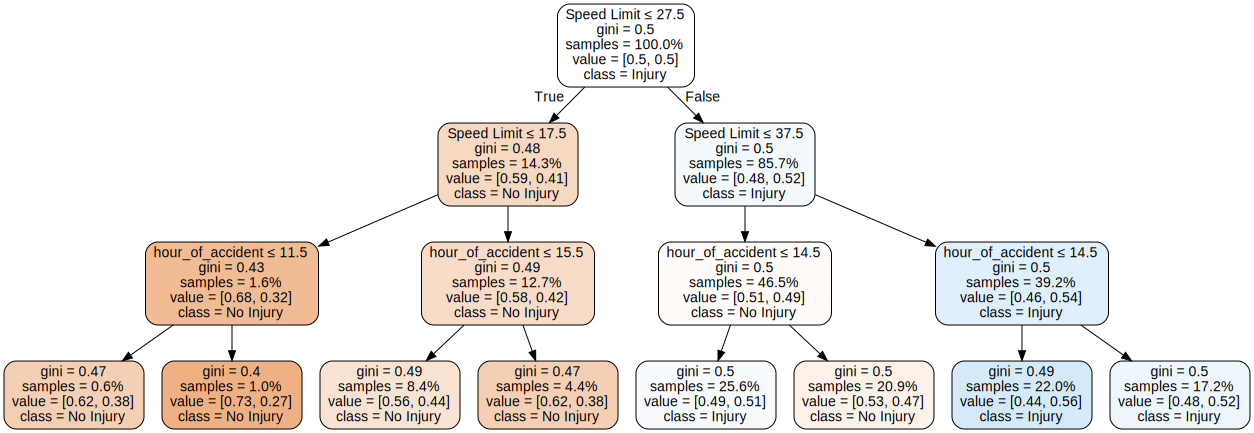

In [ ]:
def plot_tree_custom(clf):  
    target_names = ['No Injury', 'Injury']
    dot_data = export_graphviz(clf, precision=2,
                         feature_names=predictors_tree,  
                         proportion=True,
                         class_names=target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)

    # plot it
    graph = graphviz.Source(dot_data)  
    return graph
plot_tree_custom(clf)


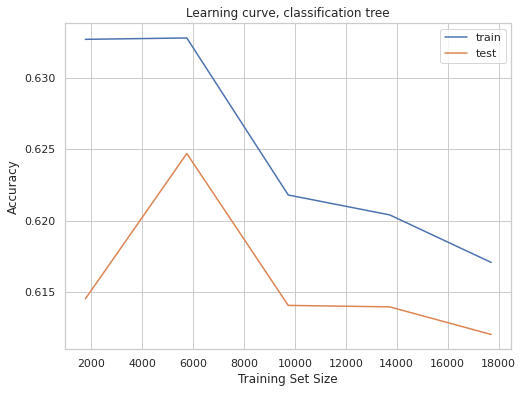

In [ ]:
plot_learning_curve(clf,X_train,y_train)

In [ ]:
accs = cross_val_score(clf, X_train_tree, y_train_tree, scoring="accuracy", cv=10)
cv_accuracy=accs.mean()
print('Cross-Validation Accuracy: {:.3f}'.format(cv_accuracy)) 

Cross-Validation Accuracy: 0.536



These two predictors have 53% of Cross-Validation accuracy and there is no overfitting on the learning curve, so these are two of the best predator selections for Tree Models for this dataset.

#### Confusion matrix

In [ ]:
def print_conf_mtx(y_true, y_pred, classes=None):
    """ Print a confusion matrix (two classes only). """
    
    if not classes:
        classes = ['neg', 'pos']
        
    # formatting
    max_class_len = max([len(s) for s in classes])
    m = max(max_class_len, len('predicted')//2 + 1)
    n = max(len('actual')+1, max_class_len)
    left       = '{:<10s}'.replace('10',str(n))
    right      = '{:>10s}'.replace('10',str(m))
    big_center = '{:^20s}'.replace('20',str(m*2))
    
    cm = confusion_matrix(y_true, y_pred)
    print((left+big_center).format('', 'predicted'))
    print((left+right+right).format('actual', classes[0], classes[1]))
    print((left+right+right).format(classes[0], str(cm[0,0]), str(cm[0,1])))
    print((left+right+right).format(classes[1], str(cm[1,0]), str(cm[1,1])))

Creating This is the Confusion matrix for the tree model with all predictors.

In [ ]:
y_pred = cross_val_predict(clf, X_train, y_train, cv=5)

In [ ]:
print_conf_mtx(y_train,y_pred,classes=["Not Injured",'Injured'])

                 predicted       
actual     Not Injured    Injured
Not Injured       4068       5760
Injured           1843       8007


We can see more errors in where predicted injuries happened, but it is actually not injured.

## **Conclusions**

In conclusion, we analyzed and predicted, and learned a lot about the crash data of Montgomery County. For one, we visualized how different movements of the vehicle can affect the severity of the victim's injury. An interesting observation was made of left turns causing fatal kinds of accidents. We also explored crash rates across various time frames- it was intriguing to look at how Covid affected the crash rates.

 

Moving towards our main goal, we developed a KNN classifier and a decision classifier tree to predict whether the victim would sustain an injury based on different features. After applying various feature selection techniques, an interesting finding was that prediction of injuries can be made just by some major features like the extent of vehicle damage, the type of vehicle collision and if the driver was at fault. Both the models performed well with the test accuracies of 61% and 65% respectively. 